In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [101]:
base = pd.read_csv('https://raw.githubusercontent.com/Gustavolorenzz/IA/main/Bases/student-por.csv', sep=';')
colunas_desejadas = ['absences','failures', 'higher','G1','G2','G3']

base = base[colunas_desejadas]
base

,absences,failures,higher,G1,G2,G3
0,4,0,yes,0,11,11
1,2,0,yes,9,11,11
2,6,0,yes,12,13,12
3,0,0,yes,14,14,14
4,0,0,yes,11,13,13
...,...,...,...,...,...,...
644,4,1,yes,10,11,10
645,4,0,yes,15,15,16
646,6,0,yes,11,12,9
647,6,0,yes,10,10,10


In [102]:
# Defina a função de mapeamento
def mapear_qualificacao(nota):
    if nota >= 15.5:
        return 'Excellent'
    elif nota >= 9.5:
        return 'Sufficient'
    else:
        return 'Poor'

# Aplicar a função às colunas G1, G2 e G3
base['G1'] = base['G1'].apply(mapear_qualificacao)
base['G2'] = base['G2'].apply(mapear_qualificacao)
base['G3'] = base['G3'].apply(mapear_qualificacao)

In [103]:
def mapear_faltas(faltas):
    if faltas >= 10:
        return 'Highlevel of absence'
    elif faltas >= 5:
        return 'Mediumlevel of absence'
    else:
        return 'Lowlevel of absence'

# Aplicar a função às colunas G1, G2 e G3
base['absences'] = base['absences'].apply(mapear_faltas)

In [ ]:
base

,absences,failures,higher,G1,G2,G3
0,Lowlevel of absence,0,yes,Poor,Sufficient,Sufficient
1,Lowlevel of absence,0,yes,Poor,Sufficient,Sufficient
2,Mediumlevel of absence,0,yes,Sufficient,Sufficient,Sufficient
3,Lowlevel of absence,0,yes,Sufficient,Sufficient,Sufficient
4,Lowlevel of absence,0,yes,Sufficient,Sufficient,Sufficient
...,...,...,...,...,...,...
644,Lowlevel of absence,1,yes,Sufficient,Sufficient,Sufficient
645,Lowlevel of absence,0,yes,Sufficient,Sufficient,Excellent
646,Mediumlevel of absence,0,yes,Sufficient,Sufficient,Poor
647,Mediumlevel of absence,0,yes,Sufficient,Sufficient,Sufficient


In [104]:
label_encoder_higher = LabelEncoder()
label_encoder_g1 = LabelEncoder()
label_encoder_g2 = LabelEncoder()
label_encoder_absences = LabelEncoder()

In [105]:
# Aplique o label encoder às colunas desejadas
base['higher'] = label_encoder_higher.fit_transform(base['higher'])
base['G1'] = label_encoder_g1.fit_transform(base['G1'])
base['G2'] = label_encoder_g2.fit_transform(base['G2'])
base['absences'] = label_encoder_absences.fit_transform(base['absences'])

In [ ]:
base

,absences,failures,higher,G1,G2,G3
0,1,0,1,1,2,Sufficient
1,1,0,1,1,2,Sufficient
2,2,0,1,2,2,Sufficient
3,1,0,1,2,2,Sufficient
4,1,0,1,2,2,Sufficient
...,...,...,...,...,...,...
644,1,1,1,2,2,Sufficient
645,1,0,1,2,2,Excellent
646,2,0,1,2,2,Poor
647,2,0,1,2,2,Sufficient


In [106]:
X_prev = base.iloc[:, 0:5].values
X_prev

array([[1, 0, 1, 1, 2],
       [1, 0, 1, 1, 2],
       [2, 0, 1, 2, 2],
       ...,
       [2, 0, 1, 2, 2],
       [2, 0, 1, 2, 2],
       [1, 0, 1, 2, 2]])

In [107]:
y_classe = base.iloc[:, 5].values
y_classe

array(['Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Excellent', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Excellent',
       'Sufficient', 'Sufficient', 'Poor', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Excellent', 'Sufficient',
       'Sufficient', 'Sufficient', 'Excellent', 'Poor', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Excellent',
       'Sufficient', 'Excellent', 'Excellent', 'Excellent', 'Sufficient',
       'Sufficient', 'Sufficient'

In [108]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 1)

In [109]:
X_treino.shape

(519, 5)

In [110]:
X_teste.shape

(130, 5)

In [111]:
label_encoder_teste = LabelEncoder()
y_treino_encoded = label_encoder_teste.fit_transform(y_treino)

In [112]:
modelo = MLPClassifier()
#model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
#0.8769230769230769
modelo = MLPClassifier(max_iter=500, verbose=True, tol=0.00001, solver = 'adam', activation = 'relu',hidden_layer_sizes = (3, 2, 1))
#0.6461538461538462
#modelo = MLPClassifier(max_iter=1000, verbose=True)
#0.8769230769230769
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.94646236
Iteration 2, loss = 0.94472955
Iteration 3, loss = 0.94293138
Iteration 4, loss = 0.94115772
Iteration 5, loss = 0.93934405
Iteration 6, loss = 0.93764241
Iteration 7, loss = 0.93588187
Iteration 8, loss = 0.93414891
Iteration 9, loss = 0.93244205
Iteration 10, loss = 0.93071616
Iteration 11, loss = 0.92906365
Iteration 12, loss = 0.92729743
Iteration 13, loss = 0.92566397
Iteration 14, loss = 0.92399747
Iteration 15, loss = 0.92236544
Iteration 16, loss = 0.92073875
Iteration 17, loss = 0.91908144
Iteration 18, loss = 0.91748831
Iteration 19, loss = 0.91589363
Iteration 20, loss = 0.91428445
Iteration 21, loss = 0.91274224
Iteration 22, loss = 0.91118221
Iteration 23, loss = 0.90959936
Iteration 24, loss = 0.90807218
Iteration 25, loss = 0.90657187
Iteration 26, loss = 0.90501563
Iteration 27, loss = 0.90354313
Iteration 28, loss = 0.90201702
Iteration 29, loss = 0.90057275
Iteration 30, loss = 0.89911353
Iteration 31, loss = 0.89761744
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(3, 2, 1), max_iter=500, tol=1e-05,
              verbose=True)

In [ ]:
modelo = MLPClassifier(max_iter=1000, verbose=True)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 1.29122668
Iteration 2, loss = 1.18843200
Iteration 3, loss = 1.09276437
Iteration 4, loss = 1.00591898
Iteration 5, loss = 0.92684749
Iteration 6, loss = 0.85640257
Iteration 7, loss = 0.79866797
Iteration 8, loss = 0.74869813
Iteration 9, loss = 0.70642219
Iteration 10, loss = 0.67370522
Iteration 11, loss = 0.64769185
Iteration 12, loss = 0.62769290
Iteration 13, loss = 0.61323725
Iteration 14, loss = 0.60142104
Iteration 15, loss = 0.59354076
Iteration 16, loss = 0.58449421
Iteration 17, loss = 0.57665772
Iteration 18, loss = 0.56887555
Iteration 19, loss = 0.56139312
Iteration 20, loss = 0.55318630
Iteration 21, loss = 0.54635923
Iteration 22, loss = 0.53899334
Iteration 23, loss = 0.53237756
Iteration 24, loss = 0.52614622
Iteration 25, loss = 0.52064054
Iteration 26, loss = 0.51527641
Iteration 27, loss = 0.51002488
Iteration 28, loss = 0.50459921
Iteration 29, loss = 0.49978905
Iteration 30, loss = 0.49493424
Iteration 31, loss = 0.49018295
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

In [113]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array(['Poor', 'Sufficient', 'Poor', 'Poor', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient', 'Poor',
       'Sufficient', 'Sufficient', 'Sufficient', 'Excellent',
       'Sufficient', 'Sufficient', 'Poor', 'Sufficient', 'Sufficient',
       'Sufficient', 'Poor', 'Poor', 'Sufficient', 'Sufficient', 'Poor',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Poor', 'Poor',
       'Sufficient', 'Sufficient', 'Sufficient', 'Excellent',
       'Sufficient', 'Excellent', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Excellent', 'Sufficient', 'Excellent',
       'Sufficient', 'Sufficient', 'Sufficient', 'Excellent',
       'Sufficient', 'Excellent', 'Excellent', 'Sufficient', 'Poor',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient', 'Poor',
       'Sufficient', 'Sufficient', 'Excellent', 'Sufficient',
       'Sufficient', 'Excellent', 'Sufficient', 'Sufficient

In [ ]:
y_teste

array(['Poor', 'Sufficient', 'Poor', 'Poor', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Excellent', 'Sufficient', 'Poor',
       'Sufficient', 'Poor', 'Sufficient', 'Excellent', 'Sufficient',
       'Sufficient', 'Poor', 'Sufficient', 'Sufficient', 'Excellent',
       'Poor', 'Sufficient', 'Sufficient', 'Sufficient', 'Poor',
       'Sufficient', 'Sufficient', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Poor', 'Sufficient',
       'Sufficient', 'Sufficient', 'Sufficient', 'Excellent',
       'Sufficient', 'Excellent', 'Sufficient', 'Sufficient',
       'Sufficient', 'Sufficient', 'Excellent', 'Sufficient', 'Excellent',
       'Sufficient', 'Excellent', 'Sufficient', 'Excellent', 'Sufficient',
       'Excellent', 'Excellent', 'Sufficient', 'Poor', 'Sufficient',
       'Sufficient', 'Sufficient', 'Poor', 'Poor', 'Excellent', 'Poor',
       'Excellent', 'Sufficient', 'Sufficient', 'Excellent', 'Sufficient',
       'Sufficient', 'Suffic

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6461538461538462

In [115]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[ 0,  0, 22],
       [ 0,  0, 24],
       [ 0,  0, 84]])

0.6461538461538462

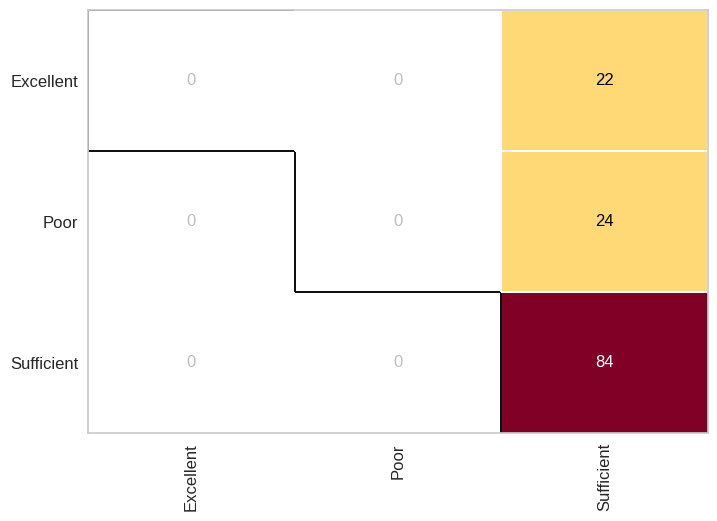

In [116]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [117]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00        22
        Poor       0.00      0.00      0.00        24
  Sufficient       0.65      1.00      0.79        84

    accuracy                           0.65       130
   macro avg       0.22      0.33      0.26       130
weighted avg       0.42      0.65      0.51       130



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
